Using batch update

Time ellapsed in training is: 2.0365002155303955
[Test set] Average loss: 0.1771, Accuracy: 1891/1991 (94.98%)



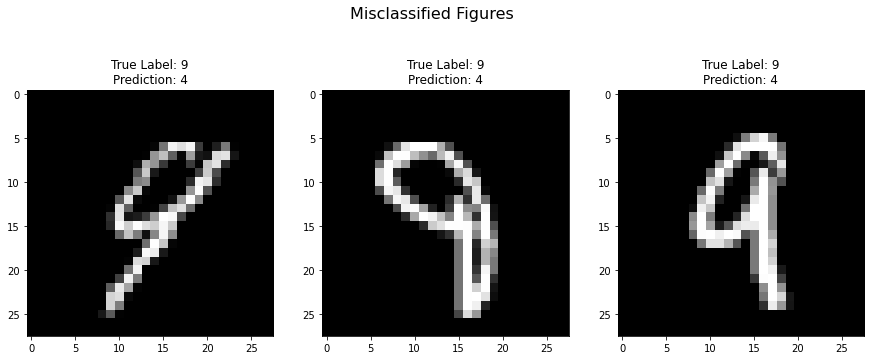

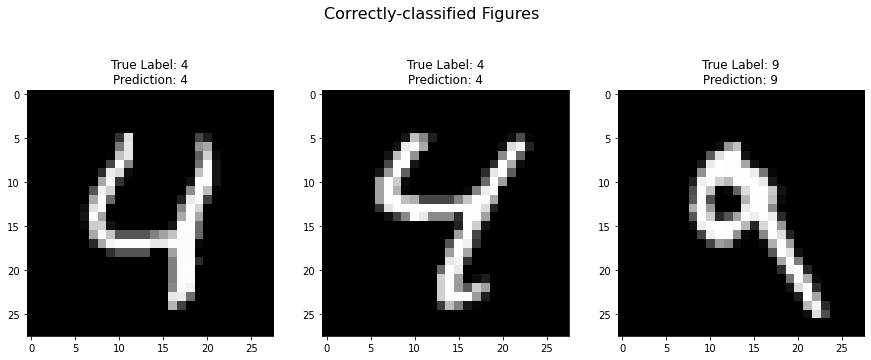

In [28]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: Create the model, specify loss function and optimizer. (LOOK HERE)
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # specify SGD with learning rate



'''
Step 4: Train model with SGD (LOOK HERE)
'''
train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)

import time
start = time.time()
# Train the model (for 3 epochs)
for epoch in range(3) :
    for images, labels in train_loader :
        # Clear previously computed gradient
        optimizer.zero_grad()

        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))

'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()